# Activity 3: Machine Learning - Student Segmentation & Risk Detection

## Objective

Use machine learning (K-Means clustering) to indentify hidden student patterns and compare ML-based segmentation with rule-based SRI risk classification.

This notebook:
- Applies clustering on engineered student scores
- Determines optimal number of clusters
- Interprets cluster profiles
- Compares ML clusters with SRI-based risk categories 
- Visualizes cluster structure

In [1]:
import os
from pathlib import Path 

In [2]:
ROOT_PATH = Path.cwd().parent
os.chdir(ROOT_PATH)
Path.cwd()

WindowsPath('d:/Desktop/1DSML/Internship/HePro code')

## Imports

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from src.models.clustering import perform_cluster

## Loading Dataset

In [4]:
df = pd.read_csv("data/processed/students_scored.csv")
df.head()

,student_id,age,program,semester,gpa,attendance,assignment_completion,engagement_score,stress_level,career_clarity,...,mental_wellbeing,productivity_score,distractions,skill_readiness,APS,WWS,PTMS,CRS,SRI,risk_category
0,S001,20,B.Tech,7,8.5,44.2,93.3,35.9,6,5,...,4,7,2,4,79.33,44.8,74.0,45.0,61.05,Yellow
1,S002,20,B.Tech,2,8.7,35.5,90.8,34.2,5,7,...,6,7,3,3,77.84,56.0,70.0,50.0,63.85,Yellow
2,S003,19,MBA,4,8.4,31.8,83.2,43.8,5,5,...,4,7,2,4,73.32,50.0,74.0,45.0,60.55,Yellow
3,S004,18,BCA,3,8.5,25.4,82.0,43.4,6,5,...,5,6,5,3,72.18,47.8,56.0,40.0,54.80,Yellow
4,S005,19,BCA,2,9.4,41.3,93.3,35.1,6,6,...,5,7,4,3,83.25,47.8,66.0,45.0,61.38,Yellow


## Select Clustering Features

In [5]:
CLUSTER_FEATURES = ["APS", "WWS", "PTMS", "CRS"]

X = df[CLUSTER_FEATURES]
X.head()

,APS,WWS,PTMS,CRS
0,79.33,44.8,74.0,45.0
1,77.84,56.0,70.0,50.0
2,73.32,50.0,74.0,45.0
3,72.18,47.8,56.0,40.0
4,83.25,47.8,66.0,45.0


## Scaling 

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Elbow Method for Optimal K

c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

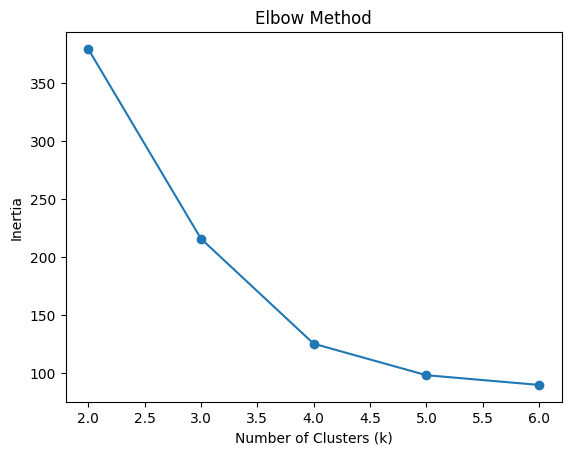

In [7]:
inertia = []
K = range(2, 7)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(K, inertia, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.show()

The elbow point indicates diminishing returns in variance reduction.
I select the k value where inertia begins to stabilize.

## Silhouette Score 

In [8]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.4f}")

k=2, silhouette score=0.4771
k=3, silhouette score=0.5049
k=4, silhouette score=0.5154
k=5, silhouette score=0.4781
k=6, silhouette score=0.4314


c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

High Silhouette score is around k's value 3(0.5049) and 4(0.5154).

We can choose K = 3 or 4

In [10]:
optimal_k = 3

## Clustering

In [11]:
scaler, df_clust, kmeans_model = perform_cluster(df, n_clusters=optimal_k, random_state=42)

df_clust.head()

c:\Users\polar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,student_id,age,program,semester,gpa,attendance,assignment_completion,engagement_score,stress_level,career_clarity,...,productivity_score,distractions,skill_readiness,APS,WWS,PTMS,CRS,SRI,risk_category,cluster
0,S001,20,B.Tech,7,8.5,44.2,93.3,35.9,6,5,...,7,2,4,79.33,44.8,74.0,45.0,61.05,Yellow,0
1,S002,20,B.Tech,2,8.7,35.5,90.8,34.2,5,7,...,7,3,3,77.84,56.0,70.0,50.0,63.85,Yellow,0
2,S003,19,MBA,4,8.4,31.8,83.2,43.8,5,5,...,7,2,4,73.32,50.0,74.0,45.0,60.55,Yellow,0
3,S004,18,BCA,3,8.5,25.4,82.0,43.4,6,5,...,6,5,3,72.18,47.8,56.0,40.0,54.80,Yellow,0
4,S005,19,BCA,2,9.4,41.3,93.3,35.1,6,6,...,7,4,3,83.25,47.8,66.0,45.0,61.38,Yellow,0


## Cluster Size Distribution

In [12]:
df_clust['cluster'].value_counts()

cluster
0    120
2     40
1     40
Name: count, dtype: int64

## Cluster profile analysis

In [13]:
cluster_profile = df_clust.groupby("cluster")[
    ["APS", "WWS", "PTMS", "CRS", "SRI"]
].mean().round(2)

cluster_profile

,APS,WWS,PTMS,CRS,SRI
cluster,,,,,
0,84.07,52.09,65.30,51.92,64.28
1,46.86,75.29,28.65,18.00,43.11
2,63.61,28.14,38.65,34.25,42.41


## K-Means with Rule-Based Comparison

In [14]:
pd.crosstab(
    df_clust["cluster"],
    df_clust["risk_category"]
)

risk_category,Blue,Green,Red,Yellow
cluster,,,,
0,43,1,0,76
1,0,0,27,13
2,0,0,33,7


## PCA Visualization

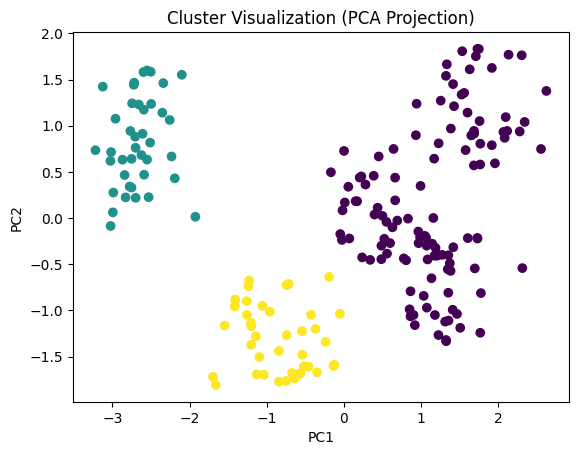

In [15]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_clust["cluster"]
)

plt.title("Cluster Visualization (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

## Sccatter Plot: APS vs WWS

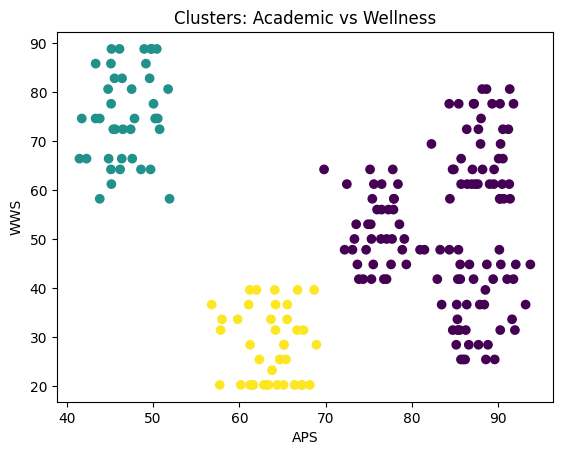

In [16]:
plt.figure()
plt.scatter(
    df_clust["APS"],
    df_clust["WWS"],
    c=df_clust["cluster"]
)
plt.xlabel("APS")
plt.ylabel("WWS")
plt.title("Clusters: Academic vs Wellness")
plt.show()


## Cluster Interpretation

Cluster 0:
- High APS (Strong academics)
- Moderate WWS (Moderate wellness)
- Moderate-High PTMS (Decent productivity) 
- Moderate CRS (Average career clarity)

**Cluster 0 vs Risk Cross Table**

| risk_category | Blue | Green | Red | Yellow |
|---------------|------|-------|-----|--------|
| cluster 0     | 43   | 1     | 0   | 76     |

**Observation**: This cluster is **Academic Performers with Moderate Risk** (Blue & Yellow Group).

--- 

Cluster 1:
- Low APS (Poor academics)
- High WWS (High Mental Wellness)
- Very Low PTMS (Very Low Productivity)
- Very Low CRS (Extremely Low Career Clarity)

**Cluster 1 vs Risk Cross Table**

| risk_category | Blue | Green | Red | Yellow |
|---------------|------|-------|-----|--------|
| cluster 1     |  0   |   0   | 27  | 13     |

**Observation**: This cluster is **Comfortable but Directionless / Disengaged** (Comfortable Red & few Blue group).

---

Cluster 2:
- Moderate APS (Academically average)
- Very Low WWS (Extremely Low wellness)
- Low PTMS (Low productivity)
- Low CRS (Low career clarity)

**Cluster 2 vs Risk Cross Table**

| risk_category | Blue | Green | Red | Yellow |
|---------------|------|-------|-----|--------|
| cluster 2     |  0   |   0   | 33  |  7     |

**Observation**: This cluster is **High-Risk Burnout Group** (Risky Red & few Borderline Yellow)


---

$\quad$

## Important Insight: Cluster VS Rule-Based Risk

The rule-based SRI system groups students primarily by overall readiness score.

However, clustering reveals structural differences within high-risk populations.

Specifically, ML identifies two distinct Red groups:

1. Burnout-driven risk (Cluster 2)
2. Directionless disengagement (Cluster 1)

While SRI classifies both as high risk, clustering differentiates the underlying causes.

This demonstrates the added value of ML-based segmentation in mentoring systems.

---

## Cluster Naming / Themes

| Cluster | Naming of the group |
|---------|---------------------|
|    0    | Academic Performers (Moderate Risk) |
|    1    | Disengaged Directionless Students |
|    2    | Burnout / High-Stress At-Risk Students |   

In [17]:
df_clust.groupby("cluster")[["APS","WWS","PTMS","CRS"]].std()


,APS,WWS,PTMS,CRS
cluster,,,,
0,6.082917,14.765887,8.648699,12.077887
1,2.817803,9.344347,7.704644,4.909436
2,3.093118,7.235978,9.208552,4.743416


Cluster 1 and Cluster 2 show low intra-cluster variance across key dimensions, indicating strong structural grouping. Cluster 0 exhibits broader variance in wellness and career readiness, suggesting heterogeneity among academically strong students. This supports the choice of k=3 as a balance between cohesion and interpretability.